In [1]:
# EXERCISE 5
# 
# Consider areas in Lombardia, that are suject to hydrogeological constraints for planning
# ("aree soggette a vincolo idrogeologico")
# https://www.regione.piemonte.it/web/temi/ambiente-territorio/foreste/tutela-bosco-territorio/vincolo-idrogeologico
#
# Considering them as a homogeneous entity, what's the percentage/fraction of each province's 
#  surface that is protected ? 
#
# Note: it is possible that there are provinces without any "constrained" areas
#
# Tips: 
# - Check "overlay" with "intersection", and do not forget what we learned about "dissolve" (and useless attributes)
#   https://geopandas.org/en/stable/gallery/overlays.html
#   https://geopandas.org/en/stable/docs/user_guide/mergingdata.html
# - ...
#
# Download protected areas dataset: 
# https://www.geoportale.regione.lombardia.it/metadati?p_p_id=detailSheetMetadata_WAR_gptmetadataportlet&p_p_lifecycle=0&p_p_state=normal&p_p_mode=view&_detailSheetMetadata_WAR_gptmetadataportlet_uuid=%7B98EA7391-21B8-4999-8343-5B74EBE3A8C8%7D


In [2]:
# Import libraries

import pandas as pd
import geopandas as gpd

import matplotlib as mpl
import matplotlib.pyplot as plt

### Esempio 5: si vuole incrociare il layer dei comuni con il layer delle aree soggette a vincoli idrogeologici per trovare la percentuale della superficie di ciascuna provincia che è sottoposta a una qualche forma di vincolo idrogeologico

In [3]:
# Load the "comuni" shapefile as a geopandas dataframe

shapefile = './regione_lomb_1/Comuni_2020_poligonali.shp'
comuni = gpd.GeoDataFrame.from_file(shapefile)
comuni

,CLASSREF,BELFIORE,COD_ISTATN,NOME_COM,COD_PRO,NOME_PRO,SIG_PRO,COD_CMO,NOME_CMO,COD_ASL,...,ANNO,ISTAT,LEGGE_ISTI,ATS_COD,ATS_DEC,CMETR_COD,CMETR_DEC,SHAPE_AREA,SHAPE_LEN,geometry
0,0570159f-0e0f-4edd-824c-23388d03a009,I276,03018144,SANT`ANGELO LOMELLINA,18,PAVIA,PV,None,None,12,...,0,18144,None,030328,ATS DI PAVIA,None,None,1.039710e+07,16920.894524,"POLYGON ((473246.942 5007601.023, 473219.080 5..."
1,560529b7-af1e-4dee-a47b-8dd8541bc6b6,D367,03015101,DRESANO,15,MILANO,MI,None,None,10,...,0,15101,None,030321,ATS DELLA CITTA' METROPOLITANA DI MILANO,001,CITTA' METROPOLITANA DI MILANO,3.505868e+06,9639.637073,"POLYGON ((527474.560 5024855.804, 527522.560 5..."
2,f3df939e-5fb6-4ccb-b040-bcfc0ee5b550,E608,03018082,LIRIO,18,PAVIA,PV,None,None,12,...,0,18082,None,030328,ATS DI PAVIA,None,None,1.801643e+06,6545.893954,"POLYGON ((520442.619 4983554.516, 520455.695 4..."
3,1274f1c9-79a2-40a4-8e4b-9e18bb967257,A849,03108009,BIASSONO,108,MONZA E DELLA BRIANZA,MB,None,None,11,...,0,108009,None,030324,ATS DELLA BRIANZA,None,None,4.793857e+06,16331.735972,"POLYGON ((521794.699 5052163.025, 521708.324 5..."
4,2eb51e8c-a2ce-418d-ba5e-ec32d2b3f219,L778,03017196,VEROLAVECCHIA,17,BRESCIA,BS,None,None,2,...,0,17196,None,030326,ATS DI BRESCIA,None,None,2.105491e+07,33160.467156,"POLYGON ((583283.590 5014246.553, 583277.806 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,fe5b9f49-0505-4d8f-b73e-b3a7e10c0e37,C014,03015060,CASSINA DE PECCHI,15,MILANO,MI,None,None,10,...,0,15060,None,030321,ATS DELLA CITTA' METROPOLITANA DI MILANO,001,CITTA' METROPOLITANA DI MILANO,7.070506e+06,17667.580037,"POLYGON ((528708.395 5041461.670, 528725.645 5..."
1502,8d59f56a-40ec-40a3-bb7a-58e72fe2f9cc,L115,03012126,TERNATE,12,VARESE,VA,None,None,14,...,0,12126,None,030322,ATS DELL'INSUBRIA,None,None,4.806990e+06,10923.525906,"POLYGON ((477662.950 5071290.280, 477655.800 5..."
1503,701c4634-f460-4aa5-9d41-074c4d85f4d7,H760,03013204,SAN BARTOLOMEO VAL CAVARGNA,13,COMO,CO,ZO16,VALLI DEL LARIO E DEL CERESIO,3,...,0,13204,None,030322,ATS DELL'INSUBRIA,None,None,1.055159e+07,18470.015263,"POLYGON ((511297.948 5102180.335, 511296.073 5..."
1504,f55a7a8b-7563-43b2-b12f-658e9b997bcc,G889,03013189,PORLEZZA,13,COMO,CO,ZO16,VALLI DEL LARIO E DEL CERESIO,3,...,0,13189,None,030322,ATS DELL'INSUBRIA,None,None,1.902149e+07,24473.450557,"POLYGON ((512470.245 5095391.447, 512469.245 5..."


In [5]:
# Aggregate into "province"
# Fonde le geometrie sulla base di un attributo.
# Esempio: per ricavare i limiti provinciali a partire da quelli comunali e possibile fondere le geometrie dei comuni salla base dell'attributo codice provinciale

province = comuni.dissolve(by='NOME_PRO', as_index=False)[['geometry','NOME_PRO']]
province

,geometry,NOME_PRO
0,"POLYGON ((569694.397 5033928.623, 569666.146 5...",BERGAMO
1,"POLYGON ((606863.723 5007764.439, 606856.264 5...",BRESCIA
2,"MULTIPOLYGON (((514535.867 5056908.059, 514574...",COMO
3,"POLYGON ((611206.034 4988831.264, 611216.541 4...",CREMONA
4,"POLYGON ((534835.773 5055189.378, 534746.574 5...",LECCO
5,"POLYGON ((558641.973 4994977.949, 558647.849 4...",LODI
6,"POLYGON ((627321.302 4975423.609, 627305.060 4...",MANTOVA
7,"MULTIPOLYGON (((541803.470 5001429.362, 541770...",MILANO
8,"POLYGON ((537219.120 5049238.476, 537215.246 5...",MONZA E DELLA BRIANZA
9,"MULTIPOLYGON (((522592.400 4956732.848, 522589...",PAVIA


In [6]:
# Open the "hydrogeology" shapefile as a geo-dataframe and explore it

idro = gpd.GeoDataFrame.from_file('regione_lomb_2/Aree_a_vincolo_Idrogeologico_ricognizione_2013.shp')
idro

,GID,SHAPE_AREA,SHAPE_LEN,geometry
0,44,1.073993e+08,433628.232304,"POLYGON ((523739.062 4967095.147, 523685.908 4..."
1,45,1.761135e+04,605.581969,"POLYGON ((518652.432 4967278.744, 518557.389 4..."
2,46,3.976191e+05,4852.476671,"POLYGON ((509373.743 4967275.851, 509340.046 4..."
3,47,3.873545e+04,1165.988275,"POLYGON ((519402.931 4967375.432, 519457.766 4..."
4,48,1.554088e+06,15096.239607,"POLYGON ((505728.247 4967505.606, 505771.135 4..."
...,...,...,...,...
591,504,2.446202e+05,3270.629646,"POLYGON ((489842.532 5077506.817, 489859.876 5..."
592,519,1.068239e+05,3413.356162,"POLYGON ((475669.020 5079970.733, 475682.000 5..."
593,521,6.338444e+05,9163.083156,"POLYGON ((468942.556 5080889.569, 468973.621 5..."
594,522,4.492243e+04,2373.550831,"POLYGON ((470156.155 5080938.611, 470182.293 5..."


<AxesSubplot:>

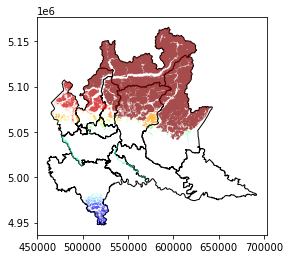

In [8]:
# Overplot the "hydrogeology" polygons on a map with "province"
# Use a shading based on the "GID" field

axp = province.plot(edgecolor='black',color='white')  # solo i confini provinciali
idro.plot(ax=axp,column='GID',cmap='jet',alpha=0.7)

In [9]:
# Now "dissolve" all the "hydrogeology" items into a single multipolygon entity (geo-df), e.g. "idro_aggr"
# da provincie a regione ora

idro_aggr = idro.dissolve()
idro_aggr  # sarà un multi poligono che contiene tutte le aeree sopra rappresentate e lo visualizzo nella cella successiva

,geometry,GID,SHAPE_AREA,SHAPE_LEN
0,"MULTIPOLYGON (((524894.702 4950821.583, 524894...",44,1.073993e+08,433628.232304


<AxesSubplot:>

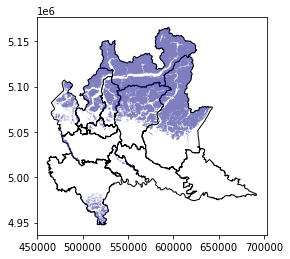

In [10]:
# And visualize on map

axp = province.plot(edgecolor='black',color='white')
idro_aggr.plot(ax=axp,cmap='jet',alpha=0.5)

In [28]:
province

,geometry,NOME_PRO,area_prov,area_idro,frac_idro
0,"POLYGON ((569694.397 5033928.623, 569666.146 5...",BERGAMO,2.758678e+09,1.568240e+09,0.568475
1,"POLYGON ((606863.723 5007764.439, 606856.264 5...",BRESCIA,4.780655e+09,2.424054e+09,0.507055
2,"MULTIPOLYGON (((514535.867 5056908.059, 514574...",COMO,1.280149e+09,6.670164e+08,0.521046
3,"POLYGON ((611206.034 4988831.264, 611216.541 4...",CREMONA,1.771277e+09,2.148489e+07,0.012130
4,"POLYGON ((534835.773 5055189.378, 534746.574 5...",LECCO,8.026002e+08,4.385371e+08,0.546395
5,"POLYGON ((558641.973 4994977.949, 558647.849 4...",LODI,7.825363e+08,3.994623e+07,0.051047
6,"POLYGON ((627321.302 4975423.609, 627305.060 4...",MANTOVA,2.342367e+09,NaN,NaN
7,"MULTIPOLYGON (((541803.470 5001429.362, 541770...",MILANO,1.575254e+09,6.431138e+07,0.040826
8,"POLYGON ((537219.120 5049238.476, 537215.246 5...",MONZA E DELLA BRIANZA,4.050988e+08,4.636572e+07,0.114455
9,"MULTIPOLYGON (((522592.400 4956732.848, 522589...",PAVIA,2.970500e+09,2.627630e+08,0.088458


In [29]:
idro_aggr

,geometry,GID,SHAPE_AREA,SHAPE_LEN
0,"MULTIPOLYGON (((524894.702 4950821.583, 524894...",44,1.073993e+08,433628.232304


In [20]:
# Now we need to find the intersection of "idro_aggr" with the province boundaries

# prov_idro = province.overlay(idro_aggr, how='intersection')
prov_idro = overlay(province, idro_aggr, how='intersection')
prov_idro

,NOME_PRO,GID,SHAPE_AREA,SHAPE_LEN,geometry
0,BERGAMO,44,1.073993e+08,433628.232304,"MULTIPOLYGON (((571175.889 5054330.761, 571188..."
1,BRESCIA,44,1.073993e+08,433628.232304,"MULTIPOLYGON (((616265.856 5036848.452, 616269..."
2,COMO,44,1.073993e+08,433628.232304,"MULTIPOLYGON (((512906.410 5057571.436, 512878..."
3,CREMONA,44,1.073993e+08,433628.232304,"MULTIPOLYGON (((569297.918 4998318.936, 569290..."
4,LECCO,44,1.073993e+08,433628.232304,"MULTIPOLYGON (((525167.842 5056127.670, 525168..."
5,LODI,44,1.073993e+08,433628.232304,"MULTIPOLYGON (((561266.620 5003541.878, 561281..."
6,MILANO,44,1.073993e+08,433628.232304,"MULTIPOLYGON (((538197.222 5033902.144, 538193..."
7,MONZA E DELLA BRIANZA,44,1.073993e+08,433628.232304,"MULTIPOLYGON (((508508.705 5048070.255, 508505..."
8,PAVIA,44,1.073993e+08,433628.232304,"MULTIPOLYGON (((524891.858 4950830.075, 524893..."
9,SONDRIO,44,1.073993e+08,433628.232304,"MULTIPOLYGON (((551516.728 5114287.681, 551513..."


<AxesSubplot:>

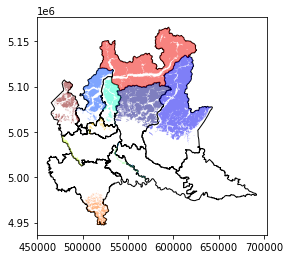

In [21]:
# And visualize on map

axp = province.plot(edgecolor='black',color='white')
prov_idro.plot(ax=axp,cmap='jet',alpha=0.5)

In [ ]:
# Add a new column with the areas, in each geo-dataframe

prov_idro['area_idro'] = prov_idro.area
province['area_prov']=province.area

In [23]:
# At this point we need to "merge" the two dataframes, so that each province has its new attributes
#
# This is done with "merge" on the name of the province, which allows to join the two dataframes 
#   even if they have a different number of elements (not all provinces may have hydrogeo constraints) 
#
# However, the result of "merge" cause a change of type from geo-dataframe to pandas-dataframe
#
# For this reason, we need an intermediate step using a pandas-df to calulate the new attribute 
#   containing the fraction of provincial area subjet to hydrogeological constraints
#
# Then we will take this new attribute and attach it to the "province" geo-df for plotting

# First, "merge" into a temporary holder "province_temp"

province_temp = province.merge(prov_idro, on='NOME_PRO', how='left')
province_temp

,geometry_x,NOME_PRO,area_prov,GID,SHAPE_AREA,SHAPE_LEN,geometry_y,area_idro
0,"POLYGON ((569694.397 5033928.623, 569666.146 5...",BERGAMO,2.758678e+09,44.0,1.073993e+08,433628.232304,"MULTIPOLYGON (((571175.889 5054330.761, 571188...",1.568240e+09
1,"POLYGON ((606863.723 5007764.439, 606856.264 5...",BRESCIA,4.780655e+09,44.0,1.073993e+08,433628.232304,"MULTIPOLYGON (((616265.856 5036848.452, 616269...",2.424054e+09
2,"MULTIPOLYGON (((514535.867 5056908.059, 514574...",COMO,1.280149e+09,44.0,1.073993e+08,433628.232304,"MULTIPOLYGON (((512906.410 5057571.436, 512878...",6.670164e+08
3,"POLYGON ((611206.034 4988831.264, 611216.541 4...",CREMONA,1.771277e+09,44.0,1.073993e+08,433628.232304,"MULTIPOLYGON (((569297.918 4998318.936, 569290...",2.148489e+07
4,"POLYGON ((534835.773 5055189.378, 534746.574 5...",LECCO,8.026002e+08,44.0,1.073993e+08,433628.232304,"MULTIPOLYGON (((525167.842 5056127.670, 525168...",4.385371e+08
5,"POLYGON ((558641.973 4994977.949, 558647.849 4...",LODI,7.825363e+08,44.0,1.073993e+08,433628.232304,"MULTIPOLYGON (((561266.620 5003541.878, 561281...",3.994623e+07
6,"POLYGON ((627321.302 4975423.609, 627305.060 4...",MANTOVA,2.342367e+09,NaN,NaN,NaN,None,NaN
7,"MULTIPOLYGON (((541803.470 5001429.362, 541770...",MILANO,1.575254e+09,44.0,1.073993e+08,433628.232304,"MULTIPOLYGON (((538197.222 5033902.144, 538193...",6.431138e+07
8,"POLYGON ((537219.120 5049238.476, 537215.246 5...",MONZA E DELLA BRIANZA,4.050988e+08,44.0,1.073993e+08,433628.232304,"MULTIPOLYGON (((508508.705 5048070.255, 508505...",4.636572e+07
9,"MULTIPOLYGON (((522592.400 4956732.848, 522589...",PAVIA,2.970500e+09,44.0,1.073993e+08,433628.232304,"MULTIPOLYGON (((524891.858 4950830.075, 524893...",2.627630e+08


In [24]:
# You can check the types of dataframe objects

print(type(province_temp))
print(type(province))

<class 'pandas.core.frame.DataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


In [25]:
# Now copy the area of each province subject to constraints into the province geo-df

province['area_idro']=province_temp['area_idro']
province

,geometry,NOME_PRO,area_prov,area_idro
0,"POLYGON ((569694.397 5033928.623, 569666.146 5...",BERGAMO,2.758678e+09,1.568240e+09
1,"POLYGON ((606863.723 5007764.439, 606856.264 5...",BRESCIA,4.780655e+09,2.424054e+09
2,"MULTIPOLYGON (((514535.867 5056908.059, 514574...",COMO,1.280149e+09,6.670164e+08
3,"POLYGON ((611206.034 4988831.264, 611216.541 4...",CREMONA,1.771277e+09,2.148489e+07
4,"POLYGON ((534835.773 5055189.378, 534746.574 5...",LECCO,8.026002e+08,4.385371e+08
5,"POLYGON ((558641.973 4994977.949, 558647.849 4...",LODI,7.825363e+08,3.994623e+07
6,"POLYGON ((627321.302 4975423.609, 627305.060 4...",MANTOVA,2.342367e+09,NaN
7,"MULTIPOLYGON (((541803.470 5001429.362, 541770...",MILANO,1.575254e+09,6.431138e+07
8,"POLYGON ((537219.120 5049238.476, 537215.246 5...",MONZA E DELLA BRIANZA,4.050988e+08,4.636572e+07
9,"MULTIPOLYGON (((522592.400 4956732.848, 522589...",PAVIA,2.970500e+09,2.627630e+08


In [26]:
# Calculate the fraction of the province area subject to hydrogeological constraints
# calcoliamo le frazioni

province['frac_idro']=province.area_idro.div(province.area_prov)
province

,geometry,NOME_PRO,area_prov,area_idro,frac_idro
0,"POLYGON ((569694.397 5033928.623, 569666.146 5...",BERGAMO,2.758678e+09,1.568240e+09,0.568475
1,"POLYGON ((606863.723 5007764.439, 606856.264 5...",BRESCIA,4.780655e+09,2.424054e+09,0.507055
2,"MULTIPOLYGON (((514535.867 5056908.059, 514574...",COMO,1.280149e+09,6.670164e+08,0.521046
3,"POLYGON ((611206.034 4988831.264, 611216.541 4...",CREMONA,1.771277e+09,2.148489e+07,0.012130
4,"POLYGON ((534835.773 5055189.378, 534746.574 5...",LECCO,8.026002e+08,4.385371e+08,0.546395
5,"POLYGON ((558641.973 4994977.949, 558647.849 4...",LODI,7.825363e+08,3.994623e+07,0.051047
6,"POLYGON ((627321.302 4975423.609, 627305.060 4...",MANTOVA,2.342367e+09,NaN,NaN
7,"MULTIPOLYGON (((541803.470 5001429.362, 541770...",MILANO,1.575254e+09,6.431138e+07,0.040826
8,"POLYGON ((537219.120 5049238.476, 537215.246 5...",MONZA E DELLA BRIANZA,4.050988e+08,4.636572e+07,0.114455
9,"MULTIPOLYGON (((522592.400 4956732.848, 522589...",PAVIA,2.970500e+09,2.627630e+08,0.088458


<AxesSubplot:>

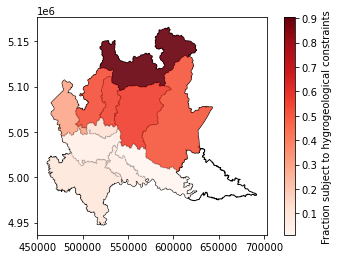

In [27]:
# Finally, plot!

axp = province.plot(edgecolor='black',color='white')
province.plot(ax=axp,column=province['frac_idro'],cmap='Reds',alpha=0.9,legend=True,
                    legend_kwds={'label': 'Fraction subject to hygrogeological constraints'})

# a mantova non ci sono vincoli